## Objectives

This notebook file is meant to give the analysts a very quick view on what dataset they will be analyzing, what key features does the dataset perform, what are the essential events and how are they distributed and a few other key aspects digital marketing analyst/product analyst would definitely spend time investigating. 

**NOTE** that this file should support most types of user log files, as they are mainly in JSON format, and the characteristics we are looking at in this notebook should be consisted in all user logs since they are the grounding and fundamental features to all sorts of user-performance/behaviour analysis.   

In [1]:
import pandas as pd
import os
import json
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def to_date(epoch):
    return datetime.datetime.fromtimestamp(epoch/1000).strftime("%Y-%m-%d")
# first convert from milliseconds to seconds, and then convert format from time stamp

In [3]:
# Read each line of data as JSON file 
data = []
with open("data/UBA_sample_data.txt", "r") as f:
    for line in f:
        data.append(json.loads(line))

In [4]:
# check dimension of data
len(data)

75092

In [5]:
# check type
tp = []
for i in range(len(data)):
    tp.append(data[i].get("type",None))
tp = pd.DataFrame({"type":tp})
print(tp["type"].value_counts())

track               65673
profile_set_once     9419
Name: type, dtype: int64


**There are 9419 profile_set_once and 65673 track. We are interested only in the track record.**

In [6]:
# check event
event = []
for i in range(len(data)):
    event.append(data[i].get("event",None))
event = pd.DataFrame({"event":event})
print(event["event"].value_counts())
print(event.isnull().sum()) # 9419 entries contain null event = number of profile_set_once.

$pageview                32620
btnClick                 13866
index_leave              10394
demo_leave                3411
about_leave               1032
courses_leave              906
formSubmit                 791
courses_play_leave         747
click_send_cellphone       600
verify_cellphone_code      563
clickSubmit                513
page_close                 230
Name: event, dtype: int64
event    9419
dtype: int64


### global variable

In [7]:
data[0].keys()

dict_keys(['distinct_id', 'lib', 'properties', 'type', 'event', '_nocache', 'time'])

- 1.distinct_id: unique identifier, for registered user:user account; for unregistered: CookieID, deviceID, etc.
- 2.nocache: A simplied identifier for internal use
- 3.type
   * profile_set_once: Directly create a Profile for the user. Different from Profile Set, if User Profile exists, then this part of string would be neglected and would not cover the existed data/value. This Profile value is meant to record the FIRST EVER ACTIVATION timestamp of a user - a valid-only-once feature when user first registers.
   * track: Record an event
- 4.time: Exact time occuring of event, measured in miliseconds
- 5.day: convert time to days using timestamp
- 6.event: `$pageview`, `btnClick`, `index_leave`, `demo_leave`, `courses_leave`, `formSubmit`, `courses_play_leave`, `click_send_cellphone`, `verify_cellphone_code`, `clickSubmit`, `page_close`
- 7.properties: contains event specific variables in a dictionary format

### pageview

In [8]:
# define a function for value_counts
def count(var):
    tp = []
    for i in range(len(data)):
        tp.append(data[i]["properties"].get(var,None))
    tp = pd.DataFrame({var:tp})
    return tp[var].value_counts().head(5)

In [9]:
count("ch")

demo             462
zhihu            105
itjuzi            10
ebiz_demo_doc      5
pedaily            5
Name: ch, dtype: int64

In [10]:
print(data[2]["event"],data[2]["properties"]) # $pageview
print(data[322]["event"],data[322]["properties"]) # page_close

$pageview {'$os': 'windows', '$model': 'pc', '$os_version': '10', '$screen_height': 768, '$screen_width': 1366, '$lib': 'js', '$lib_version': '1.6.20', '$browser': 'chrome', '$browser_version': '56', '$latest_referrer': '', '$latest_referrer_host': '', '_latest_ch': 'demo', '_session_referrer': '', '_session_referrer_host': '', 'session_page_url': 'https://sensorsdata.cn/?ch=demo', '$referrer': '', '$referrer_host': '', '$url': 'https://sensorsdata.cn/?ch=demo', '$url_path': '/', '$title': '神策数据 | Sensors Data - 国内领先的用户行为分析产品', 'ch': 'demo', '$is_first_day': True, '$is_first_time': True, '$ip': '111.204.198.242'}
page_close {'$os': 'windows', '$model': 'pc', '$os_version': '6.3', '$screen_height': 768, '$screen_width': 1366, '$lib': 'js', '$lib_version': '1.6.20', '$browser': 'chrome', '$browser_version': '56', '_session_referrer': 'https://wemart.cloud.sensorsdata.cn/user_analytics/?project=default', '_session_referrer_host': 'wemart.cloud.sensorsdata.cn', 'url_path': '/tools/code_aut

    8.os : operating system    
    9.model: type of device(pc, iphone5, etc...)    
    10.os_version: operating system version   
    11.browser: browser type(chrome, firefox, etc...)   
    12.latest_referrer: latest refereral website    
    13.latest_referrer_host : host website for latest referrel 
    14.url    
    15.title    
    16.is_first_day    
    17.is_first_time    
    18.ip
 
    Dropped: $screen_heigh, $screen_width, $lib, $lib_version, browser_version, _session_referrer, _session_referrel_host, session_page_url, $referrer, $referrel_host, $url_path, ch, _latest_ch 

### btnclick

In [11]:
print(data[3]["event"],data[3]["properties"]) # btnClick

btnClick {'$os': 'windows', '$model': 'pc', '$os_version': '10', '$screen_height': 768, '$screen_width': 1366, '$lib': 'js', '$lib_version': '1.6.20', '$browser': 'chrome', '$browser_version': '56', '$latest_referrer': '', '$latest_referrer_host': '', '_latest_ch': 'demo', '_session_referrer': '', '_session_referrer_host': '', 'session_page_url': 'https://sensorsdata.cn/?ch=demo', 'pageUrl': 'https://sensorsdata.cn/?ch=demo', 'page': 'index', 'name': 'request', 'requestBtn': '2', '$is_first_day': True, '$is_first_time': False, '$ip': '111.204.198.242'}


    19. page: previous viewed page (directed from which page)
    20. name: name of previous viewed page
    
    Dropped: pageUrl, requestBtn 

### index_leave, about_leave, courses_leave, courses_play_leave, demo_leave

In [12]:
print(data[0]["event"],data[0]["properties"]) # index_leave
print(data[74]["event"],data[74]["properties"]) # about_leave
print(data[188]["event"],data[188]["properties"]) # courses_leave
print(data[460]["event"],data[460]["properties"]) # courses_play_leave
print(data[5]["event"],data[5]["properties"]) # demo_leave

index_leave {'$os': 'windows', '$model': 'pc', '$os_version': '6.1', '$screen_height': 800, '$screen_width': 1280, '$lib': 'js', '$lib_version': '1.6.20', '$browser': 'chrome', '$browser_version': '56', '$latest_referrer': '', '$latest_referrer_host': '', '$latest_utm_source': 'baidu', '$latest_utm_medium': 'cpc', '$latest_utm_campaign': '通用词', '$latest_utm_content': '通用-用户画像', '$latest_utm_term': '用户画像', '_latest_ch': 'demo', '_session_referrer': 'https://www.baidu.com/baidu.php', '_session_referrer_host': 'www.baidu.com', 'session_page_url': 'https://www.sensorsdata.cn/?utm_source=baidu&utm_medium=cpc&utm_term=%E7%94%A8%E6%88%B7%E7%94%BB%E5%83%8F&utm_content=%E9%80%9A%E7%94%A8%2D%E7%94%A8%E6%88%B7%E7%94%BB%E5%83%8F&utm_campaign=%E9%80%9A%E7%94%A8%E8%AF%8D', 'pageUrl': 'https://sensorsdata.cn/?ch=demo', 'pageStayTime': 5.692, 'pagePosition': 2, '$is_first_day': True, '$is_first_time': False, '$ip': '219.135.131.99'}
about_leave {'$os': 'macosx', '$model': 'mac', '$os_version': '10.12'

    21.latest_utm_source: source of advertisement
    22.latest_utm_medium: medium of advertisement
    23.latest_utm_campaign: name of the advertisement series
    24.latest_utm_content: contents/types of the advertisement
    25.latest_utm_term: keywords/terms of the certain advertisement
    26.pageStayTime: staytime on a specific page
    27.pagePosition

### form Submit, click submit

In [13]:
print(data[273]["event"],data[273]["properties"]) # formsubmit
print(data[32]["event"],data[32]["properties"]) # formsubmit

formSubmit {'$os': 'windows', '$model': 'pc', '$os_version': '6.1', '$screen_height': 900, '$screen_width': 1440, '$lib': 'js', '$lib_version': '1.6.20', '$browser': 'ie', '$browser_version': '8', '$latest_referrer': 'http://www.baidu.com/baidu.php?sc.7aTK000CsN4Tg5PoJD2RkwGeLKw1QQX_gsd5_9wivon8TF7uPKdUs4_3FnTw1N47PgPb_OAt2SvUGv1KPG8Hq2iwK4vdsILAzxmfDHP5bh4Dd0RtxtSc6ED1UtRAXR-2a0yMuRZxfnq-aPU6IRzGs-dsc3h-7iNPINYT4S', '$latest_referrer_host': 'www.baidu.com', '$latest_utm_source': 'baidu', '$latest_utm_medium': 'cpc', '$latest_utm_campaign': '通用词', '$latest_utm_content': '通用-用户画像', '$latest_utm_term': '用户画像', '_session_referrer': 'http://www.baidu.com/baidu.php?sc.7aTK000CsN4Tg5PoJD2RkwGeLKw1QQX_gsd5_9wivon8TF7uPKdUs4_3FnTw1N47PgPb_OAt2SvUGv1KPG8Hq2iwK4vdsILAzxmfDHP5bh4Dd0RtxtSc6ED1UtRAXR-2a0yMuRZxfnq-aPU6IRzGs-dsc3h-7iNPINYT4S', '_session_referrer_host': 'www.baidu.com', 'session_page_url': 'https://www.sensorsdata.cn/?utm_source=baidu&utm_medium=cpc&utm_term=%E7%94%A8%E6%88%B7%E7%94%B

    28.isSuccess: is the request button successful?
    29.isMsg: is message been sent?
    30.company

### click_send_cellphone, verify_cellphone_code

In [14]:
count("result")

ajax success    535
正确              528
手机号格式错误          62
验证码错误            31
没有该号码验证信息         4
Name: result, dtype: int64

In [15]:
print(data[17]["event"],data[17]["properties"]) # click_send_cellphone
print(data[23]["event"],data[23]["properties"]) # verify_cellphone_code

click_send_cellphone {'$os': 'windows', '$model': 'pc', '$os_version': '10', '$screen_height': 768, '$screen_width': 1366, '$lib': 'js', '$lib_version': '1.6.20', '$browser': 'chrome', '$browser_version': '56', '$latest_referrer': '', '$latest_referrer_host': '', '_latest_ch': 'demo', '_session_referrer': '', '_session_referrer_host': '', 'session_page_url': 'https://sensorsdata.cn/?ch=demo', 'info': '1**********', 'result': 'ajax success', '$is_first_day': True, '$is_first_time': False, '$ip': '111.204.198.242'}
verify_cellphone_code {'$os': 'windows', '$model': 'pc', '$os_version': '10', '$screen_height': 768, '$screen_width': 1366, '$lib': 'js', '$lib_version': '1.6.20', '$browser': 'chrome', '$browser_version': '56', '$latest_referrer': '', '$latest_referrer_host': '', '_latest_ch': 'demo', '_session_referrer': '', '_session_referrer_host': '', 'session_page_url': 'https://sensorsdata.cn/?ch=demo', 'info': '9415', 'result': '正确', '$is_first_day': True, '$is_first_time': False, '$ip

    31. result: (手机号格式错误 - Cellphone number in wrong format，正确 - correct，ajax success, etc...)
    
    dropped: info
    
    * 验证码错误 - Wrong Verification Code
    * 没有该号码验证信息 - Invalid Verification Info

In [16]:
# type and event
dist_id = []
nocache = []
tp = []
time = []
event = []
day = []

# page view
os = []
model = []
os_v = []
browser = []
latest_r = []
latest_rh = []
url = []
title = []
first_d = []
first_t = []
ip = []

# button click
page = []
name = []

# leave
latest_utm_s = []
latest_utm_m = []
latest_utm_campaign = []
latest_utm_content =[]
latest_utm_t = []
staytime = []
pageposition = []

# form submit
isSuccess = []
isMsg = []
company = []

# verification
result = []

In [17]:
na = None
for i in range(len(data)):
    dist_id.append(data[i].get('distinct_id',na)) 
    tp.append(data[i].get('type',na))
    nocache.append(data[i].get('_nocache',na)) 
    event.append(data[i].get('event',na))
    os.append(data[i]['properties'].get('$os',na))
    model.append(data[i]['properties'].get('$model',na))
    os_v.append(data[i]['properties'].get('$os_version',na))
    browser.append(data[i]['properties'].get('$browser',na))
    latest_r.append(data[i]['properties'].get('$latest_referrer',na))
    latest_rh.append(data[i]['properties'].get('$latest_referrer_host',na))
    url.append(data[i]['properties'].get('$url',na))
    title.append(data[i]['properties'].get('$title',na))
    first_d.append(data[i]['properties'].get('$is_first_day',na))
    first_t.append(data[i]['properties'].get('$is_first_t',na))
    ip.append(data[i]['properties'].get('$ip',na))
    page.append(data[i]['properties'].get('page',na))
    name.append(data[i]['properties'].get('name',na))
    latest_utm_s.append(data[i]['properties'].get('$latest_utm_source',na))
    latest_utm_m.append(data[i]['properties'].get('$latest_utm_medium',na))
    latest_utm_campaign.append(data[i]['properties'].get('$latest_utm_campaign',na))
    latest_utm_content.append(data[i]['properties'].get('$latest_utm_content',na))
    latest_utm_t.append(data[i]['properties'].get('$latest_utm_term',na))
    staytime.append(data[i]['properties'].get('pageStayTime',na))
    pageposition.append(data[i]['properties'].get('pagePosition',na))
    isSuccess.append(data[i]['properties'].get('isSuccess',na))
    isMsg.append(data[i]['properties'].get('isMsg',na))
    company.append(data[i]['properties'].get('company',na))
    result.append(data[i]['properties'].get('result',na))
    time.append(data[i]['time'])
    day.append(to_date(data[i]['time']))

In [18]:
#generate pandas dataframe
df = pd.DataFrame({
    "dist_id":dist_id,
    "type":tp,
    "nocache":nocache,
    "event":event,
    "os":os,
    "model":model,
    "os version":os_v,
    "browser":browser,
    "latest_r":latest_r,
    "latest_rh":latest_rh,
    "url":url,
    "title":title,
    "first_d":first_d,
    "first_t":first_t,
    "ip":ip,
    "page":page,
    "name":name,
    "latest_utm_s":latest_utm_s,
    "latest_utm_m":latest_utm_m,
    "latest_utm_campaign":latest_utm_campaign,
    "latest_utm_content":latest_utm_content,
    "latest_utm_t":latest_utm_t,
    "staytime":staytime,
    "pageposition":pageposition,
    "isSuccess":isSuccess,
    "isMsg":isMsg,
    "company":company,
    "result":result,
    "time":time,
    "day":day
})

In [19]:
df.head(5)

,browser,company,day,dist_id,event,first_d,first_t,ip,isMsg,isSuccess,...,os,os version,page,pageposition,result,staytime,time,title,type,url
0,chrome,None,2017-03-06,595466e9a8e733434ce08de16e927d985e0b5d48,index_leave,True,None,219.135.131.99,None,None,...,windows,6.1,None,2.0,None,5.692,1488791047953,None,track,None
1,None,None,2017-03-31,9939d3e087bca29c42334d96dccd25ca0e06652a,None,None,None,None,None,None,...,None,None,None,NaN,None,NaN,1490958296645,None,profile_set_once,None
2,chrome,None,2017-03-06,9939d3e087bca29c42334d96dccd25ca0e06652a,$pageview,True,None,111.204.198.242,None,None,...,windows,10,None,NaN,None,NaN,1488791050856,神策数据 | Sensors Data - 国内领先的用户行为分析产品,track,https://sensorsdata.cn/?ch=demo
3,chrome,None,2017-03-06,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,True,None,111.204.198.242,None,None,...,windows,10,index,NaN,None,NaN,1488791051772,None,track,None
4,chrome,None,2017-03-06,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,True,None,111.204.198.242,None,None,...,windows,10,index,NaN,None,NaN,1488791056032,None,track,None


In [20]:
df.shape # 30 variables excluding properties which are not included

(75092, 30)

In [21]:
# check missing values
df.isnull().sum()

browser                 9419
company                73788
day                        0
dist_id                    0
event                   9419
first_d                 9419
first_t                75092
ip                      9419
isMsg                  74623
isSuccess              74301
latest_r               10230
latest_rh              10230
latest_utm_campaign    35189
latest_utm_content     36329
latest_utm_m           35401
latest_utm_s           34509
latest_utm_t           35997
model                   9419
name                   59922
nocache                    0
os                      9419
os version              9419
page                   63376
pageposition           58602
result                 73929
staytime               58372
time                       0
title                  42472
type                       0
url                    42494
dtype: int64

In [22]:
# drop company since company are censored
df = df.drop(['company'], axis = 1)

In [23]:
df.head()

,browser,day,dist_id,event,first_d,first_t,ip,isMsg,isSuccess,latest_r,...,os,os version,page,pageposition,result,staytime,time,title,type,url
0,chrome,2017-03-06,595466e9a8e733434ce08de16e927d985e0b5d48,index_leave,True,None,219.135.131.99,None,None,,...,windows,6.1,None,2.0,None,5.692,1488791047953,None,track,None
1,None,2017-03-31,9939d3e087bca29c42334d96dccd25ca0e06652a,None,None,None,None,None,None,None,...,None,None,None,NaN,None,NaN,1490958296645,None,profile_set_once,None
2,chrome,2017-03-06,9939d3e087bca29c42334d96dccd25ca0e06652a,$pageview,True,None,111.204.198.242,None,None,,...,windows,10,None,NaN,None,NaN,1488791050856,神策数据 | Sensors Data - 国内领先的用户行为分析产品,track,https://sensorsdata.cn/?ch=demo
3,chrome,2017-03-06,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,True,None,111.204.198.242,None,None,,...,windows,10,index,NaN,None,NaN,1488791051772,None,track,None
4,chrome,2017-03-06,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,True,None,111.204.198.242,None,None,,...,windows,10,index,NaN,None,NaN,1488791056032,None,track,None


### 1. Quick look on the EVENTS

In [24]:
df.event.value_counts()

$pageview                32620
btnClick                 13866
index_leave              10394
demo_leave                3411
about_leave               1032
courses_leave              906
formSubmit                 791
courses_play_leave         747
click_send_cellphone       600
verify_cellphone_code      563
clickSubmit                513
page_close                 230
Name: event, dtype: int64

In [25]:
form_rate = round(747.0/32620.0, 4) * 100
success_rate = round(513.0/791.0,4) * 100
button_rate = round(13866.0/32620, 4) * 100
print("%.2f"% button_rate,"%","of the people who viewed the webpage clicked a button")
print("%.2f"% form_rate,"%","of the people who viewed the webpage attempted to submit a form")
print("%.2f"% success_rate,"%","of the people successfully registered")

42.51 % of the people who viewed the webpage clicked a button
2.29 % of the people who viewed the webpage attempted to submit a form
64.85 % of the people successfully registered


* Funnel Analysis: To identify the bottleneck of conversion
* Procedure:
    View Page（浏览官网） --> Button Click（点击按钮） --> Form Submit（申请账号尝试提交） --> Click send cellphone（发送验证码） --> Verify Cellphone Code（验证码是否正确） --> Click submit (申请账号验证通过）
* It seems that most users did not attempt to submit a form

In [26]:
ls = ["$pageview","btnClick","formSubmit","click_send_cellphone","verify_cellphone_code","clickSubmit"]
funnel_df = df[df.event.isin(ls)]

$pageview                32620
btnClick                 13866
formSubmit                 791
click_send_cellphone       600
verify_cellphone_code      563
clickSubmit                513
Name: event, dtype: int64


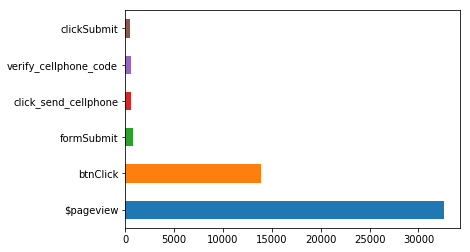

In [27]:
print(funnel_df.event.value_counts())
funnel_df.event.value_counts().plot.barh()

### 2. Quick look on the USER BROWSERS

- Why? Browsers Info can enable additional information gain about user image/user action. It also yields explanations and predictions on potential user behaviours/actions. Eg. Opening page in a new tab is more likely to be observed in Chrome users, leaving the "stay time" and "total time visiting" slightly lower than the actual values since there's usually a delay in counting times (staying on a page for 2-3s, then the time-counters starts to work). While "Safari" users are more commonly seen as visiting a new page without opening a new tab; considering the loading time of opening a new page in "Safari", the actual values would be considerably lower than recorded.
- Browsers distribution also yields user portraits as there often exists a positive correlation between the class of uers and what browser they are using. 

In [28]:
df.browser.value_counts()

chrome            42091
safari             6952
firefox            3775
qq                 2973
sogou              2779
ie                 2254
edge               1297
micromessenger     1125
uc                  866
maxthon             316
webview             292
baidu               235
theworld            153
mi                  148
opera                87
na                   87
liebao               82
android              65
360                  59
tt                   28
yandex                4
coolnovo              4
ali-ap                1
Name: browser, dtype: int64

### 3. Quick look on the DISTINCT_IDS

In [29]:
df.dist_id.value_counts()

835cc4405ee7e42e5b401a25e65b4830b02af7d3    254
e78c29d1f263477389a86add3ee4c0c575886caf    212
08ba9b365da9b395ab2a03ed1a76b97e01716a39    211
19db3f7f99eb0f14e5ea5730fe3a936996941269    205
0b904201f18f938733280545936a9a743480b925    199
95cd75560edb05c1a4e097da927a5c8301e6851c    173
66c3755db12f7aeddfc7833ba59585c6aee6d132    149
baf6ee46757fe9f224a683c3eef4bb64f3fe10a1    147
203d5340264bc657e4de1c529040dfb0dfafdc4a    139
8b2fb3aed0d951fcc5f68a2201009466f872c1b5    135
cf754597ef7701173e67b377d57645309e694ade    132
eb3c91bdb68c3a6ccfe1a477591e89b36499e1cd    126
ca87e1a0fd642c7287e822c5136a8a7bb23e5d2c    120
87091bab3fc571740f15ac4021efc4c7674776d5    119
af2c12d0b891fb24abbb0b33fd087cdfc686c72c    115
c33e5457e3c8de3e23e6926337636784998f4257    114
9966f1ebec4972718cd064668ca67c1efeb70686    112
da4481a69cefe495235cc15d0eaf846376e5f8c5    110
9b6b97ad53fc72131eeb4e068480cdd17e050cde    107
8cf296039c6a5bb9d46a2d9d3155330924cbb4aa    106
203024e10168f1269ea98dcc98c2a2e777cea862

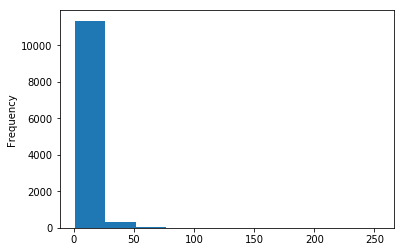

In [30]:
df.dist_id.value_counts().plot.hist()

In [31]:
# Replace the string with the first id appearing above in your user log
first_id = df[df.dist_id == "835cc4405ee7e42e5b401a25e65b4830b02af7d3"] 

In [32]:
first_id.event.value_counts()

$pageview      134
index_leave     68
btnClick        46
about_leave      6
Name: event, dtype: int64

The most active user during the week has 254 actions, including 134 page views, 68 leaving index page, 46 button clicks, and 6 about leaves. He never attempted to submit a form to view the demo page.

In [33]:
# Replace the string with the second id appearing above in your user log
second_id = df[df.dist_id == "e78c29d1f263477389a86add3ee4c0c575886caf"]

In [34]:
second_id.event.value_counts()

$pageview      104
index_leave     52
btnClick        45
about_leave      7
demo_leave       2
page_close       2
Name: event, dtype: int64

The most active user during the week has 212 actions, including 104 page views, 52 leaving index page, 45 button clicks, and 7 about leaves. He attempted to submit a form to view the demo page twice.

### 4. Quick look on the STAY TIME


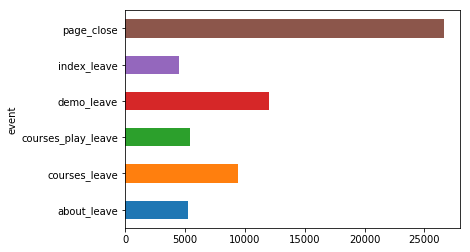

In [35]:
df.groupby('event').staytime.mean().dropna().plot.barh()